In [1]:

import ipympl
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.combination import aom, moa, average, maximization, median, majority_vote 
import scipy.io
#import matplotlib
#matplotlib.use('nbagg')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from pyod.utils.utility import standardizer
from keras.callbacks.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.python.keras.models import Model
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
 

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#mat = scipy.io.loadmat('cardio.mat')
mat = scipy.io.loadmat('satellite.mat')
#mat = scipy.io.loadmat('ionosphere.mat')


In [3]:
epochs = 50

In [4]:
cb_earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0,
mode='auto', baseline=None, restore_best_weights=False)
#pyod_model.fit(scaler, callbacks=[cb_earlystop])

In [5]:
Xtemp = mat['X']
ytemp = mat['y']
X = np.array(Xtemp)
y = np.array(ytemp)
print(X.shape)
y = y.reshape(X.shape[0],)
print(y.shape)

(6435, 36)
(6435,)


In [6]:
outliers = 0
for i in range(y.shape[0]):
    if(y[i]==1.0):
        outliers+=1;
        
print(outliers)
contam = outliers/y.shape[0]
print(contam)

2036
0.3163947163947164


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.40, random_state=6)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.40, random_state=7)

In [8]:
outliers = 0
for i in range(y_train.shape[0]):
    if(y_train[i]==1.0):
        outliers+=1;
        
print(outliers)
contam = outliers/y_train.shape[0]
print(contam)

1216
0.31494431494431496


In [9]:
outliers1 = 0
for i in range(y_test.shape[0]):
    if(y_test[i]==1.0):
        outliers1+=1;
        
print(outliers1)
contam = outliers1/y_test.shape[0]
print(contam)

820
0.3185703185703186


In [10]:
outliers1 = 0
for i in range(y_test3.shape[0]):
    if(y_test3[i]==1.0):
        outliers1+=1;
        
print(outliers1)
contam = outliers1/y_test3.shape[0]
print(contam)

816
0.317016317016317


In [11]:
x_train[0]

array([ 70, 113, 122, 103,  70, 113, 122, 103,  66, 109, 122,  96,  67,
       112, 130,  98,  63, 112, 124,  98,  67, 108, 119,  98,  63, 111,
       119,  97,  67, 111, 124,  97,  67, 106, 124,  94], dtype=uint8)

In [12]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train = StandardScaler().fit_transform(x_train)
x_train = pd.DataFrame(x_train)
x_test = StandardScaler().fit_transform(x_test)
x_test = pd.DataFrame(x_test)

x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)
x_train2 = StandardScaler().fit_transform(x_train2)
x_train2 = pd.DataFrame(x_train2)
x_test2 = StandardScaler().fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

x_train3 = pd.DataFrame(x_train3)
x_test3 = pd.DataFrame(x_test3)
x_train3 = StandardScaler().fit_transform(x_train3)
x_train3 = pd.DataFrame(x_train3)
x_test3 = StandardScaler().fit_transform(x_test3)
x_test3 = pd.DataFrame(x_test3)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)


(2574, 36)
(2574,)
(3861, 36)
(3861,)


In [13]:
x_train[0]

0       0.047180
1      -0.465742
2      -1.051938
3       0.120454
4      -0.758840
          ...   
3856    0.120454
3857   -1.198487
3858   -0.465742
3859   -0.392468
3860   -0.465742
Name: 0, Length: 3861, dtype: float64

In [14]:
x_train_full = x_train.copy()
x_train_full['y']=y_train
x_train_full2 = x_train2.copy()
x_train_full2['y']=y_train2
x_train_full3 = x_train3.copy()
x_train_full3['y']=y_train3

In [15]:
x_test_full = x_test.copy()
x_test_full['y']=y_test
x_test_full2 = x_test2.copy()
x_test_full2['y']=y_test2
x_test_full3 = x_test3.copy()
x_test_full3['y']=y_test3
#sns.scatterplot(x=0, y=1, hue='y', data=x_test_full);

In [16]:
x_train_full.shape


(3861, 37)

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

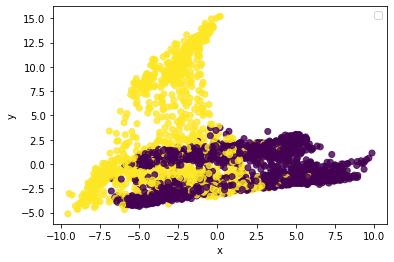

In [17]:


pca = PCA(2)
x_pca = pca.fit_transform(x_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
fig11, ax11 = plt.subplots()



ax11.scatter(x_pca['PC1'], x_pca['PC2'], c=y_train, alpha=0.8)
ax11.legend()
ax11.set_xlabel('x')
ax11.set_ylabel('y')




In [18]:
clf1 = AutoEncoder(hidden_neurons =[ 20, 10, 2,  10, 20]
                   ,contamination = contam
                   ,epochs=epochs
                  )

clf1.fit(x_train)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_1 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                740       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

Epoch 56/100
3474/3474 [==============================] - 0s 135us/step - loss: 1.2975 - val_loss: 1.3272
Epoch 57/100
3474/3474 [==============================] - 0s 133us/step - loss: 1.2843 - val_loss: 1.3161
Epoch 58/100
3474/3474 [==============================] - 0s 134us/step - loss: 1.2752 - val_loss: 1.3044
Epoch 59/100
3474/3474 [==============================] - 0s 132us/step - loss: 1.2625 - val_loss: 1.2934
Epoch 60/100
3474/3474 [==============================] - 0s 135us/step - loss: 1.2498 - val_loss: 1.2830
Epoch 61/100
3474/3474 [==============================] - 0s 134us/step - loss: 1.2402 - val_loss: 1.2729
Epoch 62/100
3474/3474 [==============================] - 0s 133us/step - loss: 1.2283 - val_loss: 1.2633
Epoch 63/100
3474/3474 [==============================] - 0s 138us/step - loss: 1.2181 - val_loss: 1.2539
Epoch 64/100
3474/3474 [==============================] - 1s 146us/step - loss: 1.2093 - val_loss: 1.2448
Epoch 65/100
3474/3474 [======================

AutoEncoder(batch_size=32, contamination=0.317016317016317, dropout_rate=0.2,
      epochs=100, hidden_activation='relu',
      hidden_neurons=[20, 10, 2, 10, 20], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000267E4FE21F8>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [19]:
x_test.shape

(2574, 36)

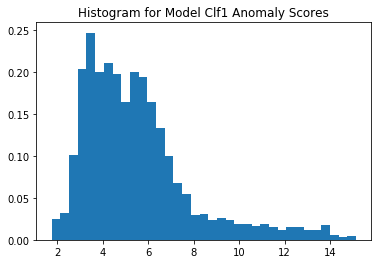

In [20]:


# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_train_pred = clf1.labels_
y_test_scores = clf1.decision_function(x_test)  # outlier scores
y_train_scores = clf1.decision_scores_  # raw outlier scores
#print(y_test_scores.shape)
y_test_scores = pd.Series(y_test_scores)
y_test_pred = clf1.predict(x_test)



 
# Plot it!
plt.close()
plt.hist(y_test_scores, bins='auto',density=True)  
plt.title("Histogram for Model Clf1 Anomaly Scores")

plt.show()

In [21]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('clf_1', y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print('clf_1', y_test, y_test_scores)


On Training Data:
clf_1 ROC:0.6149, precision @ rank n:0.4975

On Test Data:
clf_1 ROC:0.5891, precision @ rank n:0.4707


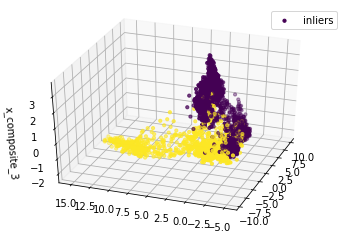

In [22]:

pca = PCA(3)
x_pca = pca.fit_transform(x_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label="inliers",c=y_train)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax.legend()
ax.view_init(azim=-160,elev=36)

plt.show()


In [23]:
error = 0
for i in range(y_test.shape[0]):
    if(y_test_pred[i]!=y_test[i]):
        error +=1
    
print(error/y_test.shape[0])


0.331002331002331


In [24]:


#%matplotlib notebook 
pca = PCA(3)
x_pca = pca.fit_transform(x_test)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.set_zlabel("x_composite_3")

ax3.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label="inliers",c=y_test_pred)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax3.legend()
ax3.view_init(azim=-160,elev=36)
plt.show()


KeyboardInterrupt: 

In [ ]:
df_test = x_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7, 0, 1)
print(df_test['cluster'].value_counts())

df_test.groupby('cluster').mean()

In [ ]:
clf2 = AutoEncoder(hidden_neurons =[20, 12, 6,  2, 6,  12, 20]
                   ,contamination = contam
                   ,epochs=epochs
                  )
clf2.fit(x_train)




In [ ]:

# Predict the anomaly scores
y_train_pred2 = clf2.labels_
y_test_scores2 = clf2.decision_function(x_test2)  

y_test_scores2 = pd.Series(y_test_scores2)
y_train_scores2 = clf2.decision_scores_  # raw outlier scores
y_test_pred2 = clf2.predict(x_test2)



plt.hist(y_test_scores2, bins='auto')  
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [ ]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('clf_2', y_train2, y_train_scores2)
print("\nOn Test Data:")
evaluate_print('clf_2', y_test2, y_test_scores2)

In [ ]:
error2 = 0
for i in range(y_test2.shape[0]):
    if(y_test_pred2[i]!=y_test2[i]):
        error2 +=1
    
print(error2/y_test2.shape[0])
error2

In [ ]:


pca = PCA(3)
x_pca = pca.fit_transform(x_test2)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_zlabel("x_composite_3")

ax2.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label="inliers",c=y_test_pred2)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax2.legend()
ax2.view_init(azim=-160,elev=36)
plt.show()


In [ ]:
# visualize('clf_2', x_train, y_train, x_test, y_test, y_train_pred,
#           y_test_pred, show_figure=True, save_figure=False)

In [ ]:
df_test2 = x_test2.copy()
df_test2['score'] = y_test_scores2
df_test2['cluster'] = np.where(df_test2['score']<6.5, 0, 1)
print(df_test2['cluster'].value_counts())

df_test2.groupby('cluster').mean()

In [ ]:
# Step 1: Build the model
clf3 = AutoEncoder(hidden_neurons =[
  #  100, 50,
    25, 1, 25
  #  , 50, 100
]
                   ,contamination = contam
                   ,epochs=epochs
                  )
clf3.fit(x_train)



In [ ]:

# Predict the anomaly scores
y_train_pred3 = clf3.labels_
y_test_scores3 = clf3.decision_function(x_test3)
#print(y_test_scores.shape)
y_test_scores3 = pd.Series(y_test_scores3)
y_train_scores3 = clf3.decision_scores_  # raw outlier scores
y_test_pred3 = clf3.predict(x_test3)


# Step 2: Determine the cut point
plt.hist(y_test_scores3, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

In [ ]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('clf_3', y_train3, y_train_scores3)
print("\nOn Test Data:")
evaluate_print('clf_3', y_test3, y_test_scores3)

In [ ]:

pca = PCA(3)
x_pca = pca.fit_transform(x_test3)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label='Score',c=y_test_scores3)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax.legend()
ax.view_init(azim=-160,elev=36)
plt.show()



In [ ]:
error3 = 0
for i in range(y_test3.shape[0]):
    if(y_test_pred3[i]!=y_test3[i]):
        error3 +=1
    
print(error3/y_test3.shape[0])
error3

In [ ]:
#sns.scatterplot(x=0, y=1, hue=y_test_scores3, data=x_test_full3, palette='RdBu_r');

In [ ]:
# visualize('clf_3', x_train, y_train, x_test, y_test, y_train_pred,
#           y_test_pred, show_figure=True, save_figure=False)

In [ ]:
df_test3 = x_test3.copy()
df_test3['score'] = y_test_scores3
df_test3['cluster'] = np.where(df_test3['score']<6.5, 0, 1)
print(df_test3['cluster'].value_counts())

df_test3.groupby('cluster').mean()

In [ ]:
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(x_test),
                             'clf2': clf2.decision_function(x_test2),
                             'clf3': clf3.decision_function(x_test3) 
                            })
    

In [ ]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [ ]:
# Combination by average
y_by_average = average(test_scores_norm)
  

  
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [ ]:


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x, y = np.random.rand(2, 100) * 4

# hist, xedges, yedges = np.histogram2d(x_test[0], y_by_maximization, bins=10, range=[[-2, 2.5], [-2, 2.5]])

# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
# ax.view_init(azim=-220,elev=36)
# plt.show()

In [ ]:
df_test = pd.DataFrame(x_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<1, 0, 1)
print(df_test['y_by_average_cluster'].value_counts())



df_test.groupby('y_by_average_cluster').mean()

In [ ]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             

plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

df_test = pd.DataFrame(x_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2, 0, 1)
print(df_test['y_by_maximization_cluster'].value_counts())

df_test.groupby('y_by_maximization_cluster').mean()

In [ ]:
# Combination by aom
y_by_aom = median(test_scores_norm)


plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

df_test = pd.DataFrame(x_test)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<0.5, 0, 1)
print(df_test['y_by_aom_cluster'].value_counts())


df_test.groupby('y_by_aom_cluster').mean()

In [ ]:
unique, counts = np.unique(y_test_pred2, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y_test2, return_counts=True)
dict(zip(unique, counts))